# **Tugas 2 Data Understanding**
## **Penjelasan Outlier Deteksi**
### **Deteksi Outlier dengan K-Nearest Neighbors (KNN) dalam Data Understanding**  
#### 1. Pengantar Outlier dalam Data Understanding
Outlier adalah titik data yang sangat berbeda dari sebagian besar data dalam dataset. Deteksi outlier penting dalam Pemahaman Data karena dapat memengaruhi hasil analisis dan pemodelan, serta mengakibatkan bias atau ketidakakuratan pada model statistik atau machine learning.
#### 2. Konsep K-Nearest Neighbors (KNN) dalam Deteksi Outlier
K-Nearest Neighbors (KNN) adalah algoritma yang mendeteksi outlier dengan prinsip bahwa data normal berada dalam kelompok rapat, sementara outlier berada jauh dari kelompok tersebut.
### 3. perhitungan K dalam KNN
Dalam metode K-Nearest Neighbors (KNN), nilai
𝑘 adalah jumlah tetangga terdekat yang digunakan untuk menganalisis suatu titik data.

🔹 Konsep Dasar:

Untuk menentukan apakah suatu data merupakan outlier atau bagian dari kelompok, kita melihat jarak data tersebut ke
𝑘 titik terdekat lainnya.
Jika jarak ke tetangga-tetangga terdekat terlalu jauh dibanding data lain, maka data tersebut kemungkinan outlier.
Semakin besar
𝑘, semakin halus analisisnya, tetapi bisa mengaburkan outlier yang sebenarnya.


*   Prinsip Kerja KNN:
KNN mengukur jarak antara titik data dan tetangga terdekatnya. Titik data yang jaraknya jauh dari kebanyakan tetangga dianggap sebagai outlier. Jika jarak rata-rata ke k-tetangga terdekat melebihi ambang batas tertentu, titik data tersebut dianggap sebagai outlier. Secara matematis, KNN menggunakan jarak seperti Euclidean, Manhattan, atau Minkowski untuk mengukur jarak antara titik data dan k-tetangga terdekat.

#### Kapan Menggunakan KNN untuk Deteksi Outlier?
KNN adalah metode efektif untuk deteksi outlier dalam situasi tertentu:

Data Berdimensi Tinggi: KNN bekerja baik pada data dengan banyak fitur, meskipun performa bisa menurun karena "curse of dimensionality".

Data Tanpa Asumsi Distribusi: KNN tidak memerlukan asumsi distribusi data, cocok untuk data yang tidak mengikuti distribusi normal atau tertentu.

Dataset dengan Ukuran Sedang: KNN cocok untuk dataset sedang karena kompleksitas komputasinya. Untuk dataset besar, metode seperti Local Outlier Factor (LOF) atau Isolation Forest lebih efisien.


### **Kesimpulan**
K-Nearest Neighbors (KNN) adalah metode efektif untuk mendeteksi outlier. Algoritma ini mengidentifikasi titik data yang berbeda signifikan dari sebagian besar data menggunakan prinsip jarak. Meskipun fleksibel dan mudah diimplementasikan, KNN memiliki keterbatasan dalam komputasi dan pemilihan parameter. Dalam praktiknya, KNN sering digunakan bersama dengan visualisasi data untuk memvalidasi hasil deteksi outlier sebelum pemodelan.

#### Install library(pustaka)
- psycopg2: Digunakan untuk menghubungkan Python dengan PostgreSQL.
- pymysql: Digunakan untuk menghubungkan Python dengan MySQL.

In [26]:
%pip install pymysql
%pip install psycopg2


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


#### Analisis Data & Koneksi Data
1. Menghubungkan ke Database:
- Gunakan psycopg2 untuk PostgreSQL atau pymysql untuk MySQL.
2. Mengambil & Mengolah Data:
- Gunakan pandas untuk membaca data dari database atau file.
- Gunakan numpy untuk perhitungan matematis.
3. Visualisasi Data:
- Gunakan seaborn dan matplotlib untuk membuat grafik.
4. Mendeteksi Outlier dengan LOF:
- Gunakan jarak Euclidean untuk menentukan kedekatan antar titik.
- Gunakan NearestNeighbors untuk mencari tetangga terdekat.
- Hitung Local Outlier Factor (LOF) untuk mendeteksi titik outlier.

In [27]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
from sklearn.neighbors import NearestNeighbors

#### Koneksi ke Database PostgreSQL
Gunakan psycopg2.connect() untuk membuat koneksi ke database PostgreSQL dengan parameter sebagai berikut:
- host: Alamat server database.
- user: Nama pengguna database.
- password: Kata sandi database.
- database: Nama database yang akan diakses.
- port: Port yang digunakan untuk koneksi PostgreSQL (10845).

In [28]:
def get_pg_data():
    conn = psycopg2.connect(
        host="pg-33e8099d-mysqlemi.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_GPVkFx92UyzKptom2fE",
        database="defaultdb",
        port=21897
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM iris_postgresql")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

#### Koneksi ke Database MySQL
Untuk membuat koneksi ke database MySQL, bisa menggunakan pymysql.connect() dengan parameter berikut:
- host: Alamat server database.
- user: Nama pengguna database.
- password: Kata sandi database.
- database: Nama database yang ingin diakses.
- port: Port untuk koneksi MySQL (10845).

In [29]:
def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-19070e2b-mysqlemi.g.aivencloud.com",
        user="avnadmin",
        password="AVNS_RF41rtqZZyQZHRTJzIq",
        database="defaultdb",
        port=21897
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM irismysql")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

#### Deteksi Outlier dengan KNN
Kode ini digunakan untuk:
- Mengambil data dari dua sumber basis data, yaitu PostgreSQL dan MySQL.
- Menggabungkan data dari kedua sumber tersebut.
- Mendeteksi nilai-nilai yang mencurigakan (outlier) menggunakan metode K-Nearest Neighbors (KNN).

 id           class  petal_length  petal_width  sepal_length  sepal_width  knn_distance  outlier
  1     Iris-setosa           1.4          0.2           5.1          3.5      0.133137    False
  2     Iris-setosa          14.0          2.0          40.9         30.0     17.746135     True
  3     Iris-setosa           1.3          0.2           4.7          3.2      0.247029    False
  4     Iris-setosa          15.0         20.0          46.0         31.0     16.556602     True
  5     Iris-setosa           1.4          0.2           5.0          3.6      0.191277    False
  6     Iris-setosa           1.7          0.4           5.4          3.9      0.360018    False
  7     Iris-setosa           1.4          0.3           4.6          3.4      0.308980    False
  8     Iris-setosa           1.5          0.2           5.0          3.4      0.167647    False
  9     Iris-setosa           1.4          0.2           4.4          2.9      0.317776    False
 10     Iris-setosa           

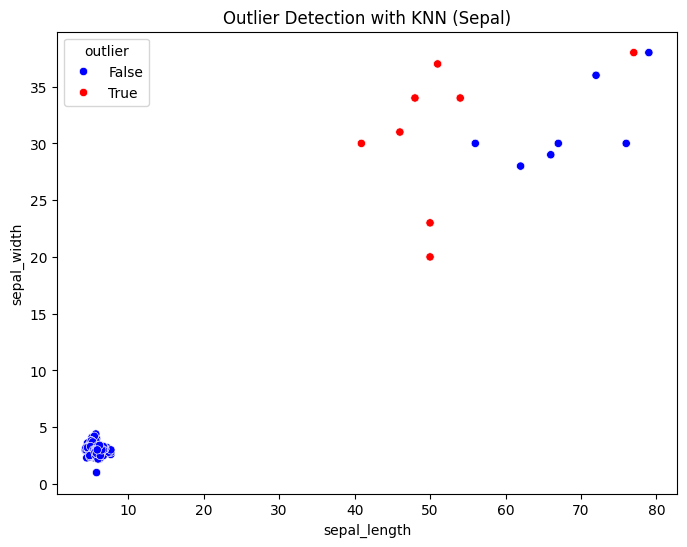

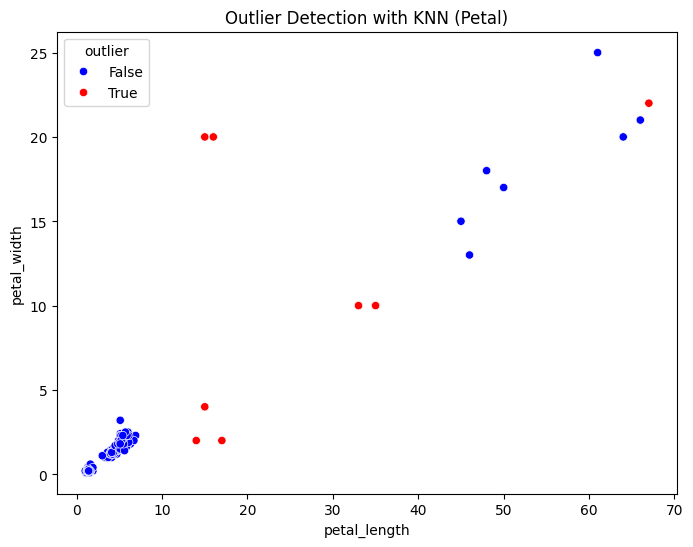

In [30]:
# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'Class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Ambil data fitur numerik
feature_columns = ["petal_length", "petal_width", "sepal_length", "sepal_width"]
data_values = df_merged[feature_columns].values

# Gunakan KNN untuk mendeteksi outlier
K = 5  # Jumlah tetangga terdekat
nbrs = NearestNeighbors(n_neighbors=K+1, metric='euclidean').fit(data_values)
distances, indices = nbrs.kneighbors(data_values)

# Ambil rata-rata jarak ke K tetangga terdekat (tidak termasuk jarak ke dirinya sendiri)
df_merged["knn_distance"] = np.mean(distances[:, 1:], axis=1)

# Tentukan threshold outlier berdasarkan persentil ke-95
threshold = np.percentile(df_merged["knn_distance"], 95)
df_merged["outlier"] = df_merged["knn_distance"] > threshold

# Cetak hasil data dengan outlier
print(df_merged.to_string(index=False))

# Visualisasi scatter plot dengan warna berdasarkan outlier
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_merged["sepal_length"], y=df_merged["sepal_width"],
    hue=df_merged["outlier"], palette={False: "blue", True: "red"}
)
plt.title("Outlier Detection with KNN (Sepal)")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_merged["petal_length"], y=df_merged["petal_width"],
    hue=df_merged["outlier"], palette={False: "blue", True: "red"}
)
plt.title("Outlier Detection with KNN (Petal)")
plt.show()

#### Total outlier
Digunakan untuk menghitung total jumlah outlier yang terdeteksi dalam dataset

In [31]:
# Hitung total outlier
total_outliers = df_merged["outlier"].sum()
print(f"Total Outlier: {total_outliers}")


Total Outlier: 8


#### Menampilkan daftar outlier yang terdeteksi


In [32]:
# Urutkan data berdasarkan jarak dari terkecil ke terbesar
df_sorted = df_merged.sort_values(by="knn_distance", ascending=True)

# Tampilkan hasilnya
print(df_sorted.to_string(index=False))


 id           class  petal_length  petal_width  sepal_length  sepal_width  knn_distance  outlier
 10     Iris-setosa           1.5          0.1           4.9          3.1      0.109282    False
 35     Iris-setosa           1.5          0.1           4.9          3.1      0.109282    False
 38     Iris-setosa           1.5          0.1           4.9          3.1      0.109282    False
  1     Iris-setosa           1.4          0.2           5.1          3.5      0.133137    False
 40     Iris-setosa           1.5          0.2           5.1          3.4      0.139494    False
 18     Iris-setosa           1.4          0.3           5.1          3.5      0.152207    False
 28     Iris-setosa           1.5          0.2           5.2          3.5      0.164215    False
 29     Iris-setosa           1.4          0.2           5.2          3.4      0.164215    False
  8     Iris-setosa           1.5          0.2           5.0          3.4      0.167647    False
 31     Iris-setosa           

In [33]:
outliers = df_merged[df_merged["outlier"]].sort_values(by="knn_distance", ascending=False)
print("Outlier Teratas:")
print(outliers.to_string(index=False))

Outlier Teratas:
 id           class  petal_length  petal_width  sepal_length  sepal_width  knn_distance  outlier
  2     Iris-setosa          14.0          2.0          40.9         30.0     17.746135     True
 61 Iris-versicolor          35.0         10.0          50.0         20.0     17.373225     True
 94 Iris-versicolor          33.0         10.0          50.0         23.0     16.800181     True
  4     Iris-setosa          15.0         20.0          46.0         31.0     16.556602     True
 12     Iris-setosa          16.0         20.0          48.0         34.0     16.371222     True
 21     Iris-setosa          17.0          2.0          54.0         34.0     15.904666     True
 22     Iris-setosa          15.0          4.0          51.0         37.0     15.115576     True
118  Iris-virginica          67.0         22.0          77.0         38.0     13.853855     True


#### Menggunakan dataset Iris dari scikit-learn

In [34]:
from sklearn.datasets import load_iris
import pandas as pd

# Load dataset
iris = load_iris()

# Buat DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Ganti nama kolom agar sesuai dengan yang diminta
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Ambil hanya kolom yang diperlukan
X = df[['petal_length', 'petal_width', 'sepal_length', 'sepal_width']]

print(X.head())  # Cek hasil

   petal_length  petal_width  sepal_length  sepal_width
0           1.4          0.2           5.1          3.5
1           1.4          0.2           4.9          3.0
2           1.3          0.2           4.7          3.2
3           1.5          0.2           4.6          3.1
4           1.4          0.2           5.0          3.6


 #### Memuat dataset Iris, mengonversinya menjadi DataFrame pandas, dan menampilkan bentuk serta isinya.

In [35]:
from sklearn.datasets import load_iris
import pandas as pd

# Load dataset
iris = load_iris()

# Buat DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Ganti nama kolom agar sesuai dengan yang diminta
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Ambil semua data
X = df[['petal_length', 'petal_width', 'sepal_length', 'sepal_width']]

# Cek jumlah data
print(X.shape)  # Output: (150, 4)
print(X)

(150, 4)
     petal_length  petal_width  sepal_length  sepal_width
0             1.4          0.2           5.1          3.5
1             1.4          0.2           4.9          3.0
2             1.3          0.2           4.7          3.2
3             1.5          0.2           4.6          3.1
4             1.4          0.2           5.0          3.6
..            ...          ...           ...          ...
145           5.2          2.3           6.7          3.0
146           5.0          1.9           6.3          2.5
147           5.2          2.0           6.5          3.0
148           5.4          2.3           6.2          3.4
149           5.1          1.8           5.9          3.0

[150 rows x 4 columns]


#### Memisahkan outlier dari data

In [36]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split , KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, Normalizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.inspection import DecisionBoundaryDisplay

def get_pg_data():
    conn = psycopg2.connect(
        host="pg-33e8099d-mysqlemi.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_GPVkFx92UyzKptom2fE",
        database="defaultdb",
        port=21897
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM iris_postgresql")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-19070e2b-mysqlemi.g.aivencloud.com",
        user="avnadmin",
        password="AVNS_RF41rtqZZyQZHRTJzIq",
        database="defaultdb",
        port=21897
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM irismysql")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'class'
df_merge = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Ambil data fitur numerik tanpa kolom 'class'
feature_columns = ["petal_length", "petal_width", "sepal_length", "sepal_width"]
data_values = df_merge[feature_columns].values

# Inisialisasi model LOF
clf = LocalOutlierFactor(n_neighbors=90)
label = clf.fit_predict(data_values)

# Tambahkan hasil label ke dataframe
df_merge["outlier_label"] = label

# Cetak hasil dengan ID dan class
print(df_merge.to_string(index=False))

num_outliers = (label == -1).sum()
print(f"\nJumlah outlier: {num_outliers}")
df_filtered = df_merge[label == 1].drop(columns=["outlier_label"], errors='ignore')
outliers = df_merge[label == -1].drop(columns=["outlier_label"], errors='ignore')
print("\nData Outlier:")
print(outliers.to_string(index=False))
print("\nJumlah data setelah dihapus : ",len(df_filtered))
print("\nData tidak outlier :")
print(df_filtered.to_string(index=False))

 id           class  petal_length  petal_width  sepal_length  sepal_width  outlier_label
  1     Iris-setosa           1.4          0.2           5.1          3.5              1
  2     Iris-setosa          14.0          2.0          40.9         30.0             -1
  3     Iris-setosa           1.3          0.2           4.7          3.2              1
  4     Iris-setosa          15.0         20.0          46.0         31.0             -1
  5     Iris-setosa           1.4          0.2           5.0          3.6              1
  6     Iris-setosa           1.7          0.4           5.4          3.9              1
  7     Iris-setosa           1.4          0.3           4.6          3.4              1
  8     Iris-setosa           1.5          0.2           5.0          3.4              1
  9     Iris-setosa           1.4          0.2           4.4          2.9              1
 10     Iris-setosa           1.5          0.1           4.9          3.1              1
 11     Iris-setosa  

Kode ini berfungsi untuk mendeteksi serta memisahkan data outlier dari dataset yang diambil dari dua sumber basis data, yaitu PostgreSQL dan MySQL. Langkah pertama adalah membangun koneksi ke kedua basis data menggunakan pustaka *psycopg2* untuk PostgreSQL dan *pymysql* untuk MySQL. Setelah itu, query digunakan untuk mengekstrak data dari tabel *iris_postgresql* dan *iris_mysql*. Data yang diperoleh kemudian diubah menjadi DataFrame menggunakan pustaka *pandas* dan digabungkan melalui metode *inner join* berdasarkan kolom *id* dan *class*, sehingga hanya data yang ada di kedua tabel yang dipertahankan.

Selanjutnya, fokus beralih ke fitur numerik seperti *petal_length*, *petal_width*, *sepal_length*, dan *sepal_width* untuk proses deteksi outlier. Model *Local Outlier Factor* (LOF) dari pustaka *scikit-learn* digunakan dengan parameter *n_neighbors=90*, yang artinya setiap data akan dibandingkan dengan 90 tetangga terdekat untuk menentukan apakah data tersebut adalah outlier. Model LOF memberikan label 1 untuk data normal dan -1 untuk outlier.

Hasil analisis ini ditambahkan ke DataFrame sebagai kolom baru bernama *outlier_label*. Selanjutnya, jumlah total data yang diklasifikasikan sebagai outlier dihitung berdasarkan label -1. Dataset kemudian dipisahkan menjadi dua: data normal (label 1) disimpan dalam variabel *df_filtered* dan data outlier (label -1) disimpan dalam variabel *outliers*.

Sebagai hasil akhir, kode ini menampilkan dataset yang telah diberi label, jumlah total outlier, serta daftar data yang dianggap outlier maupun data yang tersisa setelah proses pembersihan. Pendekatan ini mempermudah identifikasi dan penghapusan outlier sebelum dilakukan analisis lebih lanjut, sehingga meningkatkan kualitas data dan meminimalkan risiko bias pada hasil analisis atau prediksi model pembelajaran mesin.

#### Menghitung akurasi dari data

In [40]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier, LocalOutlierFactor
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

# Pisahkan fitur dan label
X = df_merged[feature_columns]
y = df_merged["class"]

# Encode label kelas ke numerik
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Menerapkan LOF untuk deteksi outlier
lof = LocalOutlierFactor(n_neighbors=90, contamination=0.1)
outlier_labels = lof.fit_predict(X)
df_merged["outlier"] = outlier_labels

# Pisahkan data dengan outlier dan tanpa outlier
df_cleaned = df_merged[df_merged["outlier"] == 1].drop(columns=["outlier"])

# Membagi data menjadi training (80%) dan testing (20%) untuk data dengan outlier
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

# Fit ulang LabelEncoder setelah menghapus outlier
label_encoder_clean = LabelEncoder()
df_cleaned["class"] = label_encoder_clean.fit_transform(df_cleaned["class"])

# Membagi data menjadi training dan testing untuk data tanpa outlier
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(
    df_cleaned[feature_columns],
    df_cleaned["class"],
    test_size=0.2,
    random_state=42
)

# Pipeline dengan StandardScaler dan KNN
knn_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=11))
])

# Latih model pada data dengan outlier
knn_pipeline.fit(X_train_all, y_train_all)
y_pred_all = knn_pipeline.predict(X_test_all)
accuracy_all = accuracy_score(y_test_all, y_pred_all)
print("Akurasi dengan outlier:", accuracy_all)

# Pastikan hanya kelas yang ada digunakan dalam laporan klasifikasi
print(classification_report(y_test_all, y_pred_all, target_names=label_encoder.classes_[np.unique(y_test_all)]))

# Latih model pada data tanpa outlier
knn_pipeline.fit(X_train_clean, y_train_clean)
y_pred_clean = knn_pipeline.predict(X_test_clean)
accuracy_clean = accuracy_score(y_test_clean, y_pred_clean)
print("Akurasi tanpa outlier:", accuracy_clean)

# Pastikan hanya kelas yang ada digunakan dalam laporan klasifikasi
print(classification_report(y_test_clean, y_pred_clean, target_names=label_encoder_clean.classes_[np.unique(y_test_clean)]))


Akurasi dengan outlier: 0.967741935483871
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.92      1.00      0.96        11
 Iris-virginica       1.00      0.89      0.94         9

       accuracy                           0.97        31
      macro avg       0.97      0.96      0.97        31
   weighted avg       0.97      0.97      0.97        31

Akurasi tanpa outlier: 0.9642857142857143
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.96        28
      macro avg       0.95      0.96      0.95        28
   weighted avg       0.97      0.96      0.96        28



Kode ini bertujuan untuk menganalisis perbedaan akurasi serta performa klasifikasi model K-Nearest Neighbors (KNN) pada dua jenis dataset: dataset yang masih mengandung outlier dan dataset yang telah melalui proses pembersihan. Proses dimulai dengan memilih fitur numerik dari DataFrame gabungan yang akan digunakan untuk model, serta mengubah label kelas menjadi angka menggunakan *LabelEncoder*. Model *Local Outlier Factor* (LOF) diterapkan kembali, dengan parameter *n_neighbors=90* dan *contamination=0.1*, yang menunjukkan bahwa sekitar 10% data akan diklasifikasikan sebagai outlier. Dataset kemudian dipisahkan menjadi dua versi: satu dengan outlier dan satu lagi tanpa outlier.

Selanjutnya, kedua dataset dibagi menjadi data pelatihan (80%) dan data pengujian (20%) menggunakan *train_test_split*. Model KNN dengan 11 tetangga diterapkan menggunakan *Pipeline*, yang mengintegrasikan proses standarisasi data dengan *StandardScaler* sebelum melatih model. Model pertama dilatih pada dataset yang mengandung outlier, kemudian akurasi serta laporan klasifikasi dihitung berdasarkan hasil prediksi terhadap data uji. Laporan ini meliputi metrik seperti precision, recall, dan F1-score untuk setiap kelas. Langkah yang sama dilakukan pada dataset yang telah dibersihkan dari outlier.

Hasil akhirnya adalah dua nilai akurasi: satu untuk model yang dilatih pada data dengan outlier dan satu lagi untuk data tanpa outlier. Selain itu, laporan klasifikasi juga dihasilkan untuk mengevaluasi dampak keberadaan outlier terhadap performa model. Biasanya, model yang dilatih pada data tanpa outlier diharapkan menunjukkan performa yang lebih baik, karena outlier dapat mengganggu perhitungan jarak pada algoritma KNN dan menurunkan keakuratan prediksi. Dengan membandingkan hasil ini, pengguna dapat memahami dampak outlier terhadap performa model serta mengevaluasi manfaat membersihkan dataset sebelum proses klasifikasi.